In [87]:
#Merton Jump Diffusion process
#X(t) = (muS-0.5*sigma^2)*t + sigma*W(t) + sum_{i=1}^{N(t)} Z_i

import numpy as np
import matplotlib.pyplot as plt

In [88]:
#Define parameters and time grid
npaths = 20000 # number of paths
T = 1 # time horizon
nsteps = 200 # number of time steps
dt = T/nsteps # time step
t=np.linspace(0,T,num=nsteps) # observation times
mu = .0005
sigma = 0.05
S0 = 1 # initial stock price
muJ = .0007
sigmaJ = 0.2
lam = 0.8

In [89]:
# Monte Carlo

# Compute the increments of the arithmetic Brownian motion
dW = mu*dt + sigma*np.random.normal(0,1,(npaths,nsteps))*np.sqrt(dt);

# Compute the increments of Compound Poisson Process
dN = np.random.poisson(lam*dt,(npaths,nsteps))
dJ = muJ*dN + sigmaJ*np.sqrt(dN)*np.random.normal(0,1,(npaths,nsteps))
dX = dJ + dW


# Accumulate the increments
X = np.cumsum(dX,axis=1);

# Calculate stock price taking the exponential
S = S0*np.exp(X) 

# Expected Path
EX = np.exp((mu+lam*muJ)*t);

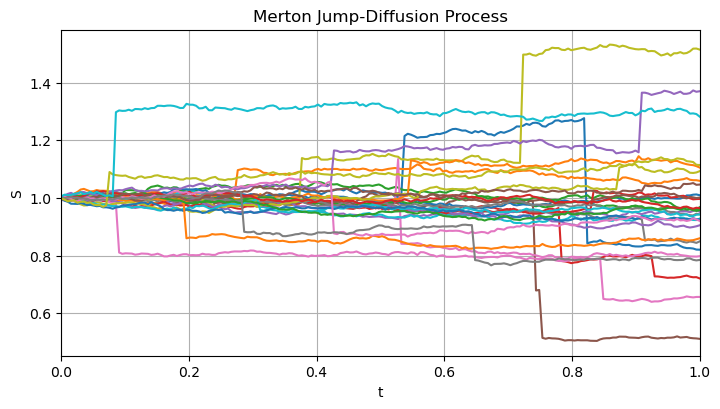

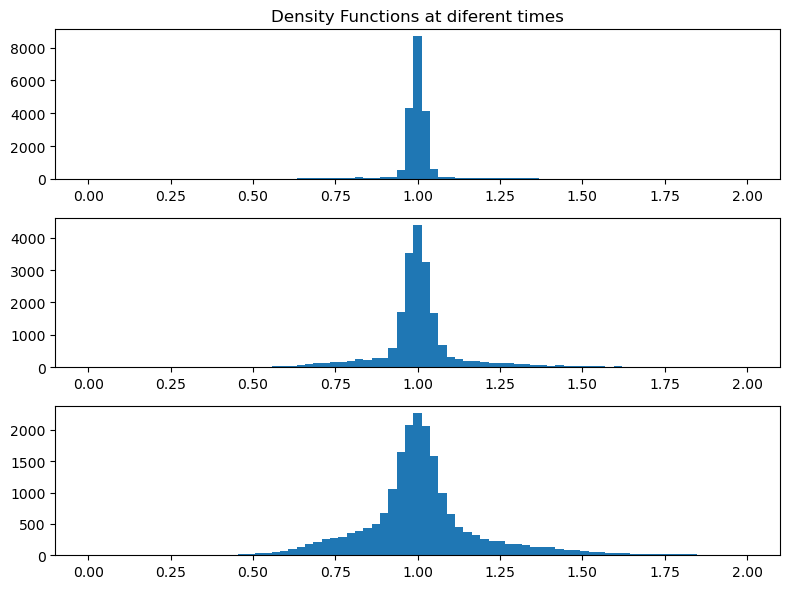

In [95]:
#Sample Paths
plot0 = plt.figure(0,figsize=(7,4), dpi=100)
plt.title('Merton Jump-Diffusion Process')
for i in range(30):
    plt.plot(t,S[i+40,:])
#plt.plot(t,EX,'black') #Expected Path
plt.tight_layout()
plt.xlim([0,1])
#plt.ylim([.6,1.5])
plt.xlabel('t')
plt.ylabel('S')
plt.grid()
plt.show()

plot2 = plt.figure(2,figsize=(8,6), dpi=100)
x=np.linspace(0,2,num = 80);
plt.subplot(3,1,1)
plt.title('Density Functions at diferent times')
plt.hist(S[:,30],x)
plt.tight_layout()

plt.subplot(3,1,2)
plt.hist(S[:,90],x)
plt.tight_layout()

plt.subplot(3,1,3)
plt.hist(S[:,199],x)
plt.tight_layout()